<a href="https://colab.research.google.com/github/jecampagne/cours_mallat_cdf/blob/main/cours2025/Wavelet_approx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Wavelet reconstruction of signal (1D)
Use a k-highest thresholding strategy.

PyWavelets library.

The file "special_demo_func.csv"  is on the same github repository and
can be uploaded in the user "/content/drive/My Drive" and then read as
shown in this nb.

In [1]:
import numpy as np
from  scipy import signal
from sklearn.preprocessing import MinMaxScaler


In [2]:
!pip install -U PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 18.0 MB/s eta 0:00:00


In [3]:
# PyWavelets
import pywt

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('image', cmap='jet')
mpl.rcParams['font.size'] = 16

# The signal

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
import os
os.chdir("/content/drive/My Drive/Data4CoursSMallat")

In [88]:
from numpy import genfromtxt
my_data = genfromtxt('special_demo_func.csv', delimiter=',')
my_data.shape

(1024, 2)

In [22]:
time = my_data[:,0]
y = my_data[:,1]
Ns = len(time)

In [39]:
def Thresh_hard_sparse(x, k, return_ind=False):
    """
    Keep only k largest entries of x and return their indices.
    Parameters
    """
    _x = x.copy()
    ind = np.argpartition(abs(_x), -k, axis=None)[-k:]
    ind = np.unravel_index(ind, _x.shape)
    ind_del = np.ones(_x.shape, dtype=bool)
    ind_del[ind] = False
    _x[ind_del] = 0
    if return_ind:
      return _x, ind_del
    else:
      return _x

# Input parameters

In [60]:
wavelet = "db6"
nlevel = 5
pad_mode="constant" # "border values are replicated"
coeff_perc = 0.15   # percentage of coeff (approx+details)

# Wavelet decomposition

In [61]:
filter = pywt.Wavelet(wavelet)
coeffs = pywt.wavedec(y, filter, level=nlevel, mode=pad_mode)

# Thresholding : k-highest coefficient

In [62]:
coeff_vec, coeff_slices, coeff_shapes = pywt.ravel_coeffs(coeffs)
n_coeffs =int(coeff_perc * len(coeff_vec))
coeff_k, ind = Thresh_hard_sparse(coeff_vec, n_coeffs,return_ind=True)
coeffs = pywt.unravel_coeffs(coeff_k, coeff_slices,
                                       coeff_shapes, output_format='wavedec')

In [77]:
print("nber of coeff kept:",np.count_nonzero(coeff_k), "over a total of:",len(coeff_vec), ", nber of samples:",Ns)
true_reduction = np.count_nonzero(coeff_k)/len(coeff_vec)

nber of coeff kept: 161 over a total of: 1076 , nber of samples: 1024


# Reconstruction

In [64]:
approx_y= pywt.waverec(coeffs, filter, mode=pad_mode)

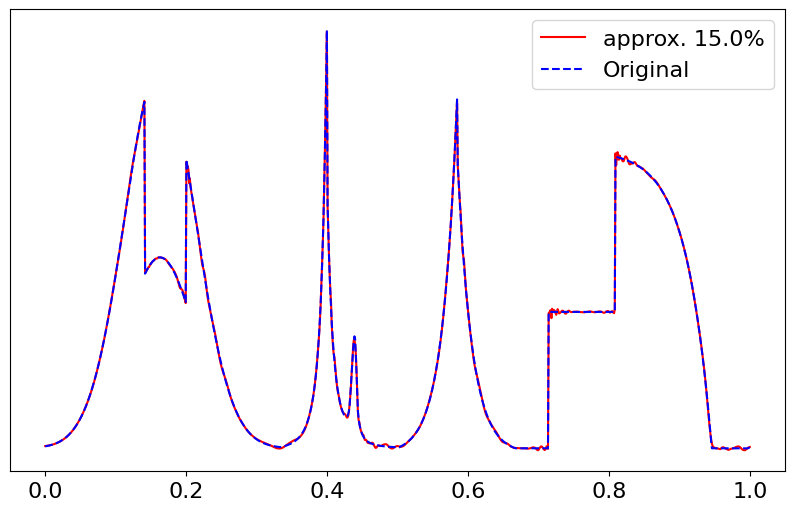

In [75]:
fig=plt.figure(figsize=(10,6))
plt.plot(time,approx_y,label=f"approx. {100*true_reduction:.1f}%",c='red');
plt.plot(time,y,label="Original",ls='--',c="blue");
plt.legend();
plt.yticks([]);

In [102]:
print(f"\|f-f_{{app}}\|^2/\|f\|^2 = {np.linalg.norm(approx_y-y)**2/np.linalg.norm(y)**2:.2e}")

\|f-f_{app}\|^2/\|f\|^2 = 1.41e-04
